#  Linear Regression: Predicting the Body Mass of Penguins 
In this notebook, we implement **Linear Regression** using a custom **SingleNeuron** class with:
- Identity activation function
- Mean squared error loss

We apply it to predict the **Body Mass** of penguins based on physical features.

In this notebook, we will also:
- Explain the concept of Linear Regression
- Preprocess and explore the dataset
- Implement Linear Regression from scratch
- Visualize and evaluate the model

##  What is Linear Regression?
Linear regression models the relationship between a **dependent variable** and one or more **independent variables** using a straight line.
The equation is:
`y = w1*x1 + w2*x2 + ... + b`
The goal is to find weights `w` and bias `b` that minimize the difference between predicted and actual values.

## Import Libraries
This cell imports essential Python libraries required for data handling, visualization, and implementing the linear regression model on the hearts data.

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

## Load and Prepare Penguins Data

In [111]:
data = pd.read_csv("penguins.csv")
penguins_df=data.copy(deep = True)
penguins_df = penguins_df.dropna()
penguins_df=penguins_df[(penguins_df['species']=="Adelie")]
penguins_df.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
147  Adelie      Dream            36.6           18.4              184.0   
148  Adelie      Dream            36.0           17.8              195.0   
149  Adelie      Dream            37.8           18.1              193.0   
150  Adelie      Dream            36.0           17.1              187.0   
151  Adelie      Dream            41.5           18.5              201.0   

     body_mass_g     sex  
0         3750.0    MALE  
1  

## Explore the Data

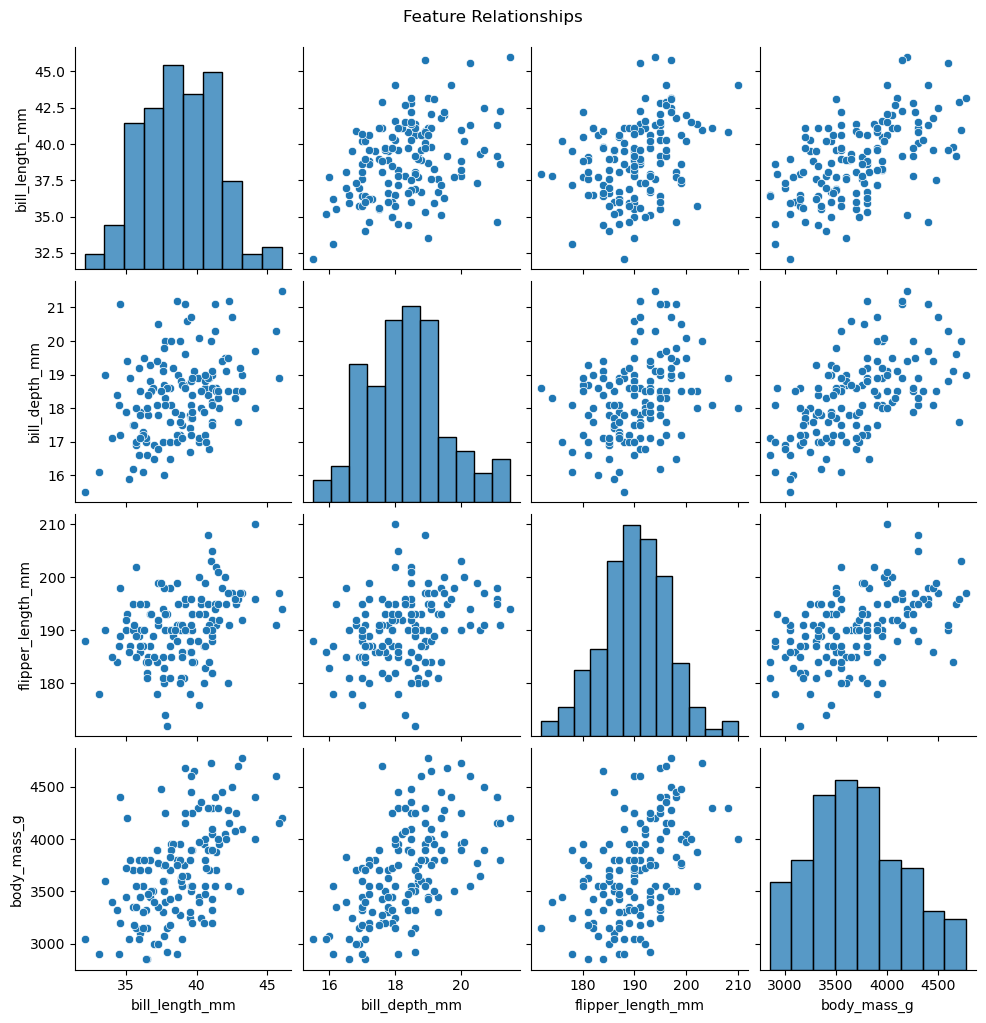

In [112]:
features=['bill_length_mm','bill_depth_mm','flipper_length_mm']
target='body_mass_g'
sns.pairplot(penguins_df, vars=features + [target])
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

From the above comparisons, we can see that the features are mostly clustered together.
Hence, we will perform the linear regression algorithm on **flipper_length_mm** and the **body_mass_g** for simplicity.

In [113]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

penguins=data.copy(deep = True)
penguins = penguins.dropna()
penguins=penguins[(penguins['species']=="Adelie")]


penguins['flipper_length_mm']=ss.fit_transform(penguins[['flipper_length_mm']])
# 
penguins['body_mass_g']=mms.fit_transform(penguins[['body_mass_g']])
penguins['body_mass_g']=ss.fit_transform(penguins[['body_mass_g']])

X=penguins['flipper_length_mm'].values
X = X.reshape(-1, 1)

y=penguins['body_mass_g'].values
print("Xshape: ",X.shape)
print("yshape: ",y.shape)

Xshape:  (146, 1)
yshape:  (146,)


## Visualize Penguins Regression Data

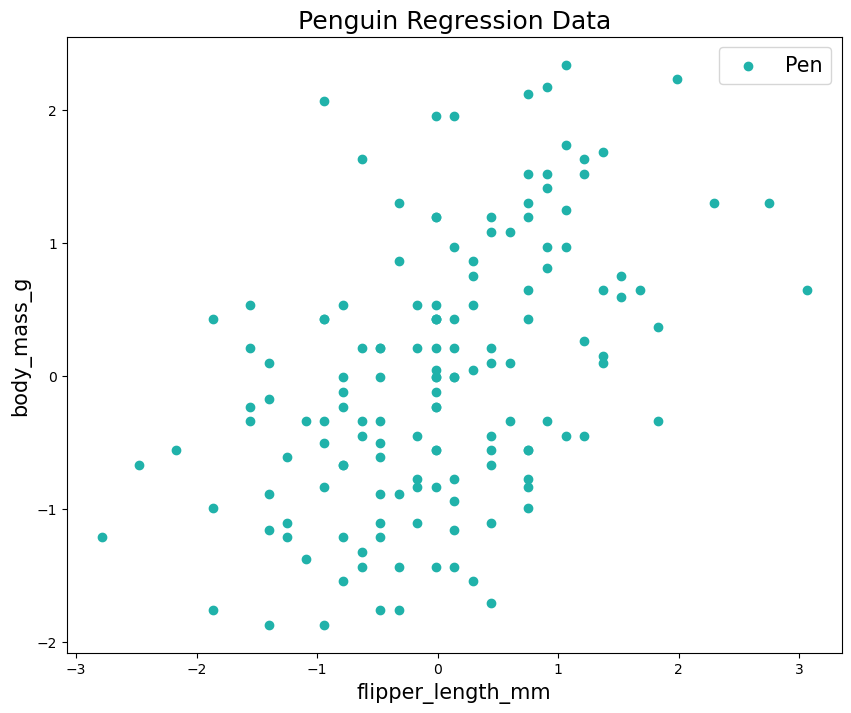

In [114]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Pen")
plt.xlabel("flipper_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.title("Penguin Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

## Split Dataset into Training and Testing Sets
This cell splits the dataset into training and testing subsets using an 80/20 split.

In [115]:
#Split data into test and trainung data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Linear Regression Implementation: Define Single Neuron and Activation fucntion

In [116]:
def activation(z):
    return z

class SingleNeuron():
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

## Train the Perceptron 
This cell trains the Perceptron model using the training data.

In [117]:
neuron = SingleNeuron(activation)
neuron.train(X_train, y_train, alpha=0.005, epochs=100)

##  View Regression data and line
Our regression function then seeks a line if best fit that will best give an accurate corellation between the two attributes if the penguins

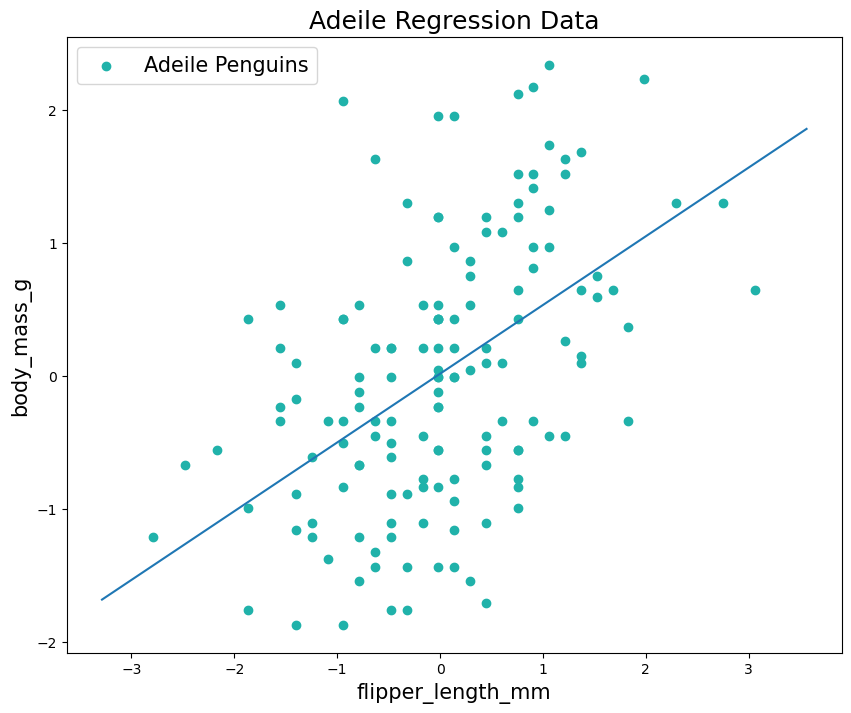

In [118]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Adeile Penguins")
plt.plot(domain, neuron.predict(domain.reshape(-1, 1)))
plt.xlabel("flipper_length_mm", fontsize = 15)
plt.ylabel("body_mass_g", fontsize = 15)
plt.title("Adeile Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

##  Evaluate Model Performance

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

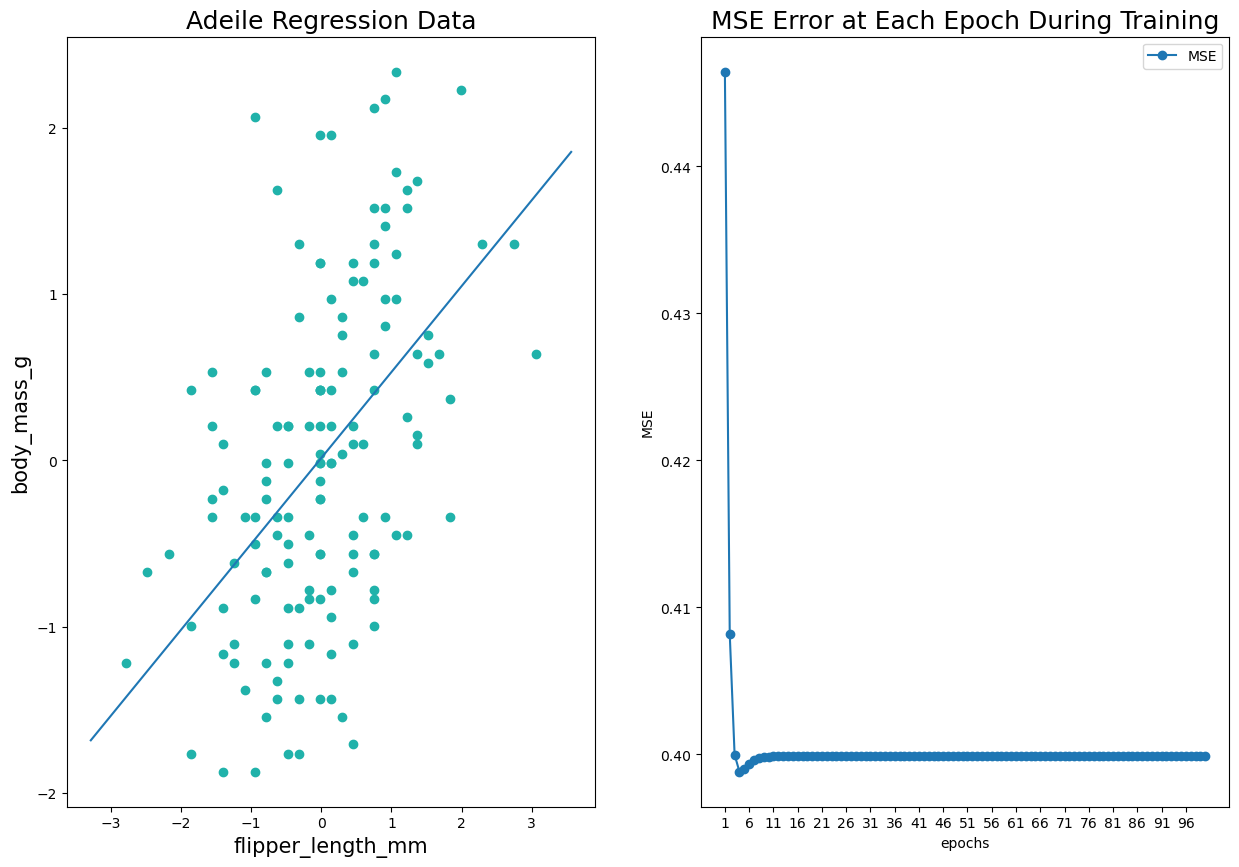

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, neuron.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("flipper_length_mm", fontsize = 15)
ax1.set_ylabel("body_mass_g", fontsize = 15)
ax1.set_title("Adeile Regression Data", fontsize = 18)

ax2.plot(range(1, len(neuron.errors_) + 1), 
         neuron.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(neuron.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

As we can see, the mse error at each epoch reduces and reaches a minimum somewhere around 5 epochs at about 0.39. but soon stabilizes to about 0.4.
Our regression is fairly accurate in giving a correlation between body mass and flipper length for the Adeile Penguins

## Takeaways
- We built a linear regression model using a single neuron.
- Training was done using gradient descent.
- Visualization shows good predictive performance on this dataset.